In [106]:
import pandas as pd
import numpy as np
from sklearn import tree

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': (12, 8)})

In [52]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 

from IPython.display import HTML
style = "<style>{width:50% !important; height:10% !important;}</style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv('C:/work/Datasets/Titanic/train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.shape

(891, 12)

In [10]:
titanic_data.size

10692

In [13]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# проверка на пустые значения

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
# доля пропусков в данных

round(titanic_data.isna().mean() * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [32]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [40]:
# кодировка номинативных переменных

X = pd.get_dummies(X)

In [43]:
# замена пропущенных значений в столбце Age медианным значением

X = X.fillna({'Age': X.Age.median()})

In [35]:
y = titanic_data.Survived

In [44]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [48]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [49]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

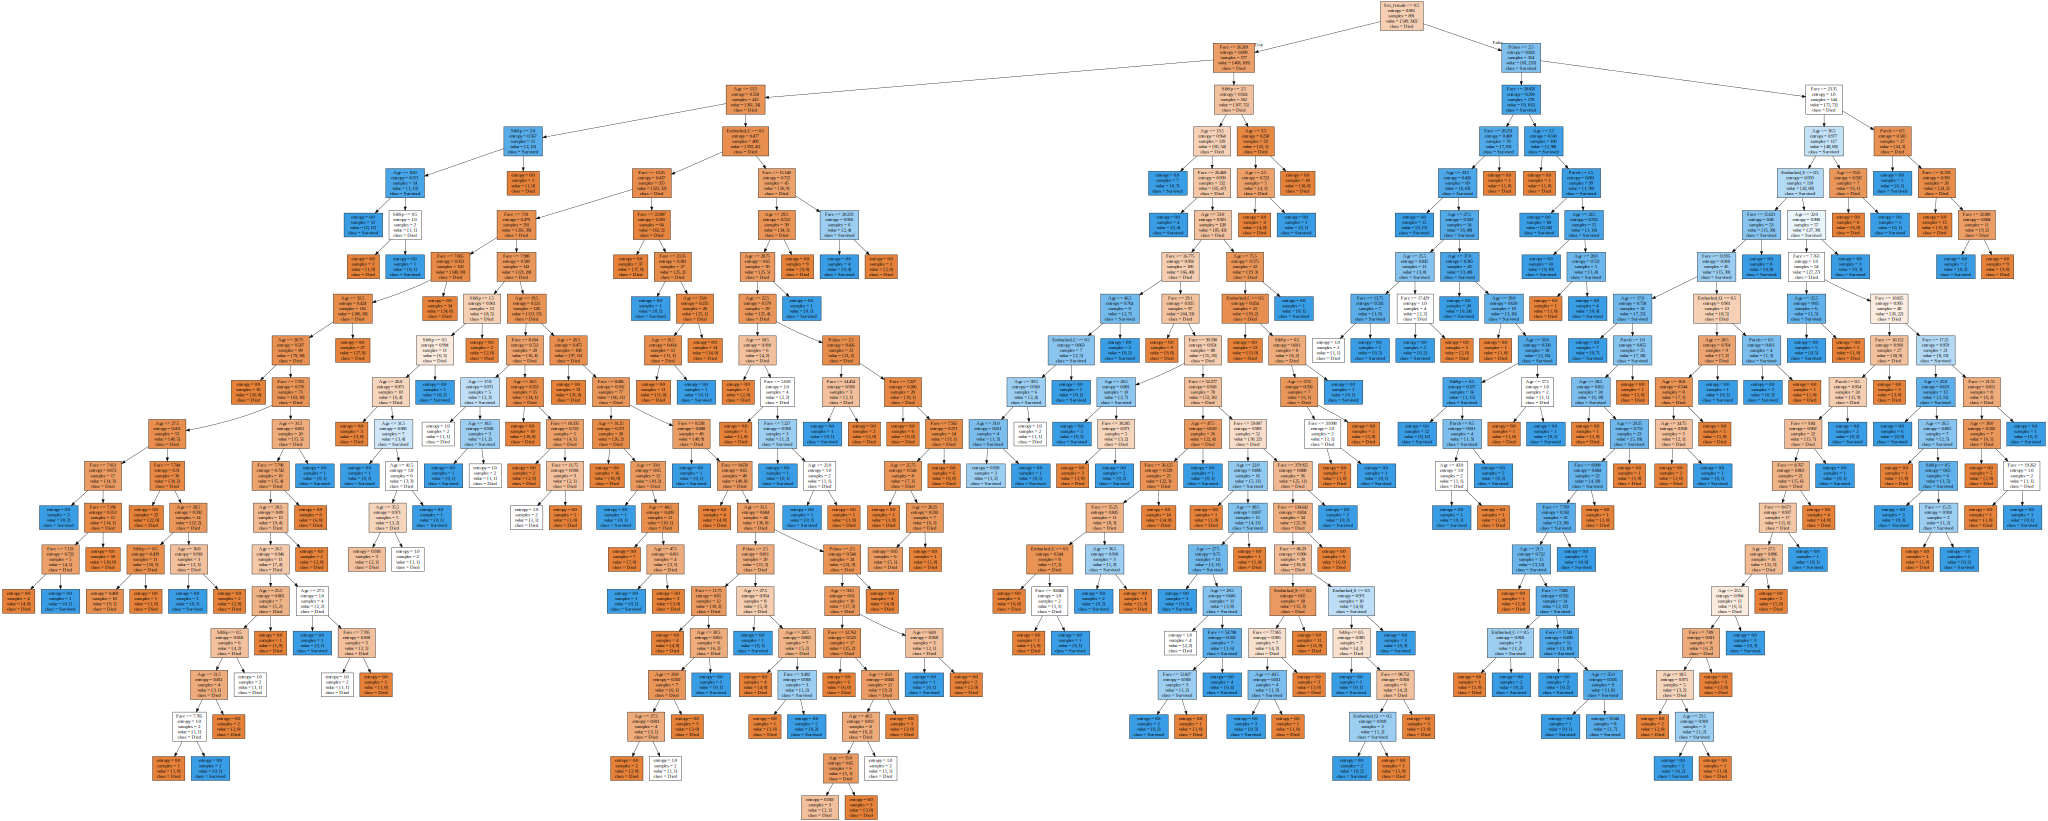

In [53]:
# дерево графически

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X), 
                                    class_names=['Died', 'Survived'],
                                    filled=True))

display(SVG(graph.pipe(format='svg')))

Получился оверфитинг - переобучение модели: вместо общей закономерности модель пытается безошибочно классифицировать каждое наблюдение в выборке. 

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [56]:
# метод score предсказывает количество правильных ответов

clf.score(X, y)

0.9797979797979798

In [57]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
clf.score(X_train, y_train)

0.9798657718120806

In [60]:
clf.score(X_test, y_test)

0.7661016949152543

In [65]:
# ограничение глубины дерева

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [66]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
clf.score(X_train, y_train)

0.8238255033557047

In [68]:
clf.score(X_test, y_test)

0.8203389830508474

Тренировочные данные - хуже, но тестовые - лучше.


In [142]:
max_depth_values = range(1,120)

In [143]:
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf,
                                           X_train,
                                           y_train,
                                           cv=5).mean()
    
    temp_score_data = pd.DataFrame(
        {'max_depth': [max_depth],
         'train_score': [train_score],
         'test_score': [test_score],
         'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [144]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [145]:
# разворачиваем датафрейм в плоский формат

scores_data_long = pd.melt(scores_data, id_vars='max_depth', value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='sep_type', value_name='score')

In [146]:
scores_data_long.head()

,max_depth,sep_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [147]:
scores_data_long[scores_data_long.sep_type == 'cross_val_score'].sort_values('score', ascending=False).head()

,max_depth,sep_type,score
249,12,cross_val_score,0.802059
247,10,cross_val_score,0.802031
243,6,cross_val_score,0.800392
245,8,cross_val_score,0.798683
248,11,cross_val_score,0.798669


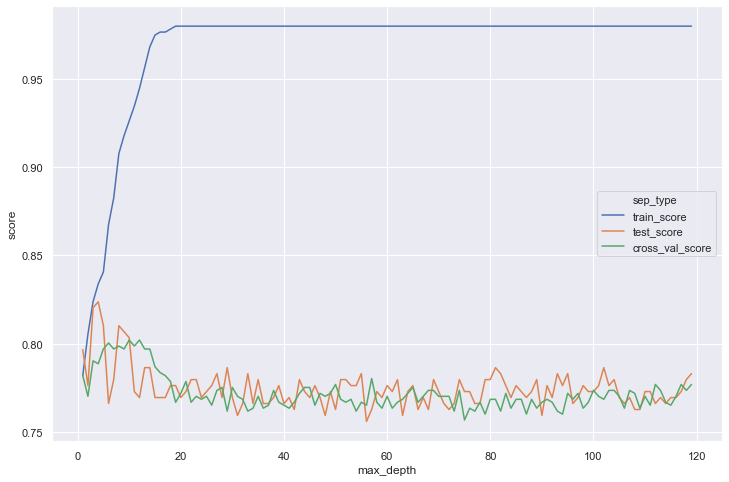

In [148]:
sns.lineplot(x='max_depth', y='score', hue='sep_type', data=scores_data_long)

In [149]:
# кроссвалидация

from sklearn.model_selection import cross_val_score

In [150]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [151]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [153]:
# проверяем на тестовых данных

best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.8

In [180]:
df_iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
df_iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [181]:
df_iris_train.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df_iris_test.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [182]:
df_iris_train.rename(columns={'Unnamed:_0': 'num'}, inplace=True)
df_iris_test.rename(columns={'Unnamed:_0': 'num'}, inplace=True)

In [183]:
df_iris_train.head()

,num,sepal_length,sepal_width,petal_length,petal_width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [184]:
df_iris_test.head()

,num,sepal_length,sepal_width,petal_length,petal_width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [189]:
X_train = df_iris_train.drop(['num', 'species'], axis=1)
X_test = df_iris_test.drop(['num', 'species'], axis=1)

y_train = df_iris_train.species
y_test = df_iris_test.species

In [190]:
scores_data_iris = pd.DataFrame()

rs = np.random.seed(0)

max_depth_values = range(1, 100)

In [191]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf,
                                           X_train,
                                           y_train,
                                           cv=5).mean()
    
    temp_score_data = pd.DataFrame(
        {'max_depth': [max_depth],
         'train_score': [train_score],
         'test_score': [test_score],
         'cross_val_score': [mean_cross_val_score]})
    
    scores_data_iris = scores_data_iris.append(temp_score_data)

In [192]:
scores_data_iris.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.94,0.96
0,5,1.00,0.92,0.96


In [195]:
# разворачиваем датафрейм в плоский формат

scores_data_iris_long = pd.melt(scores_data_iris, id_vars='max_depth',
                                value_vars=['train_score', 'test_score', 'cross_val_score'],
                                var_name='sep_type', value_name='score')

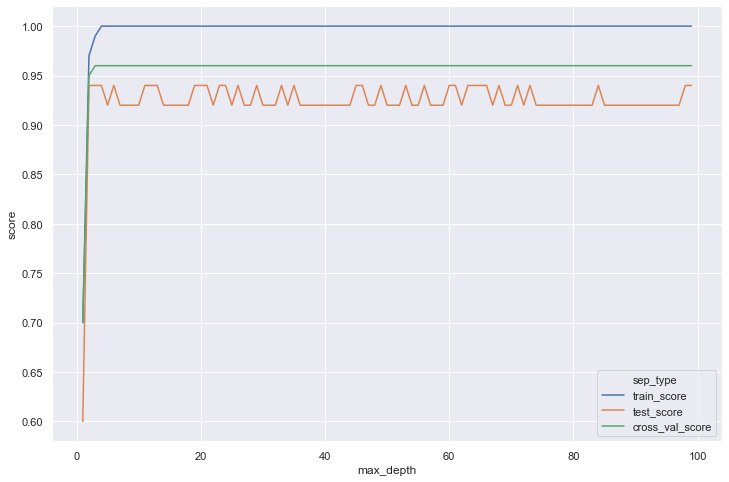

In [196]:
sns.lineplot(x='max_depth', y='score', hue='sep_type', data=scores_data_iris_long)

In [197]:
scores_data_iris_long[scores_data_iris_long.sep_type == 'cross_val_score'].sort_values('score', ascending=False).head()

,max_depth,sep_type,score
247,50,cross_val_score,0.96
272,75,cross_val_score,0.96
270,73,cross_val_score,0.96
269,72,cross_val_score,0.96
268,71,cross_val_score,0.96


In [198]:
clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [199]:
cross_val_score(clf_iris, X_train, y_train, cv=5).mean()

0.9600000000000002